# Experiment 13

## Implement K-Means Clustering using any given dataset

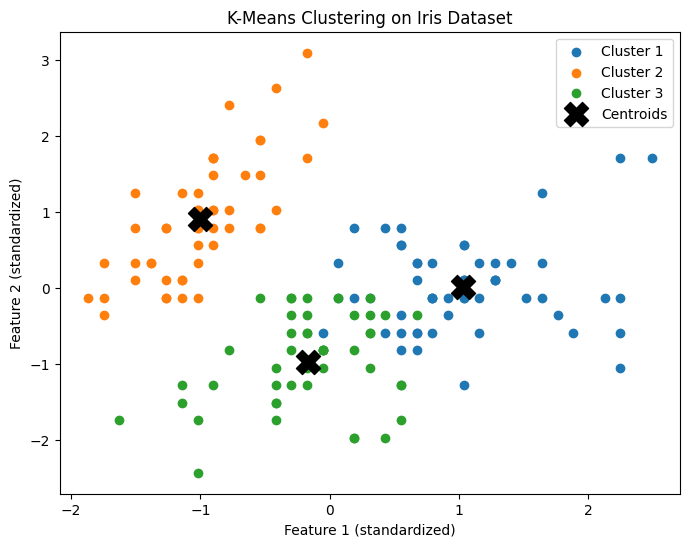

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset and standardize it
iris = datasets.load_iris()
X = iris.data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize for better performance

# K-Means clustering function
def initialize_centroids(X, k):
    # Randomly choose k data points as initial centroids
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [np.linalg.norm(x - centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = X[clusters == i]
        new_centroid = points_in_cluster.mean(axis=0) if len(points_in_cluster) > 0 else np.zeros(X.shape[1])
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def has_converged(old_centroids, centroids):
    return np.all(old_centroids == centroids)

def k_means(X, k, max_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(X, centroids)
        # Update centroids
        old_centroids = centroids
        centroids = update_centroids(X, clusters, k)
        # Check for convergence
        if has_converged(old_centroids, centroids):
            break
    return clusters, centroids

# Set parameters and apply K-Means clustering
k = 3
clusters, centroids = k_means(X, k)

# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(k):
    points = X[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.title("K-Means Clustering on Iris Dataset")
plt.show()